<div style="border:solid black 2px; padding: 20px">
<div class="alert alert-warning">

# Understanding Passenger Preferences and The Impact of Trips External Factors on Zuber Ride-Sharing Company - by awrb

</div>

# Table of Contents: <a id='tableofcontents'></a>

    - 1. Introduction
        - 1.1 Goal
        - 1.2 Stages
    - 2. Data Overview
        - 2.1 Conclusions
    - 3. Data Preprocessing
        - 3.1 Ensuring for Data Type
        - 3.2 Ensuring for Array Form
        - 3.3 Ensuring for Missing Values
        - 3.4 Ensuring for Duplicate Data
        - 3.5 Conclusions
    - 4. Identifying the Top 10 Regions
        - 4.1 Identifying the top 10 regions to serve as delivery points
        - 4.2 Conclusions
    - 5. Graph Analysis
        - 5.1 Conclusions
    - 6. Hypothesis Testing
        - 6.1 Hypothesis: The average journey duration from the Loop to O'Hare International Airport
        - 6.2 Formulating the null hypothesis and alternative hypothesis
        - 6.3 Testing the Hypothesis 
        - 6.4 Findings
    - 7. Presentation
    - 8. General Conclusion

## Introduction

        Zuber is a recently launched ride-sharing company in Chicago. As an analyst at the company, I would analyze to find patterns in the available information. The aim of this project is to understand passenger preferences and the impact of external factors on trips.

    The following is a Data Description regarding the database containing information on taxi trips in Chicago:

    Table 'neighborhoods': data related to the area in the city of Chicago
    - 'name': region name
    - 'neighborhood_id': area code

    Table 'cabs': data related about taxi data
    - 'cab_id': vehicle code
    - 'vehicle_id': Vehicle technical ID
    - 'company_name': the name of the company that owns the vehicle

    Table 'trips': data related about trip
    - 'trip_id': trip code
    - 'cab_id': operating vehicle code
    - 'start_ts': date and time the trip started (time rounded off in hours)
    - 'end_ts': end date and time of trip (time rounded to hours)
    - 'duration_seconds': trip duration in seconds
    - 'distance_miles': distance tripped in miles
    - 'pickup_location_id': pickup area code
    - 'dropoff_location_id': delivery area code

    Table 'weather_records': data related about weather 
    - 'record_id': weather code
    - 'ts': date and time when the weather record was made (time rounded to hours)
    - 'temperature': the temperature at which the weather record was made
    - 'description': a brief description of the weather conditions, such as "light rain" (drizzle) or "scattered clouds" (cloudy).


### A. Goal

        By using the database, I will analyze the data from competitors and test hypotheses regarding the effect of weather on trip frequency. In working on this project, it was divided into two stages, namely by using SQL and Python on Jupiterhub. And in this section, I will elaborate on working with Python on Jupiterhub.

        Description of the hypothesis that needs to be tested is as follows:
    "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."

        Using the last query result data file of:
    'project_sql_result_07.csv'

        The file contains the trips data from the Loop to O'Hare International Airport. Followings are the values of the columns in this table are:
    - 'start_ts'- pick-up date and time
    - 'weather_conditions'- weather conditions when the trip begins
    - 'duration_seconds'- trip duration in seconds

        The followings are the points in testing this hypothesis:
    - Formulate null hypothesis and alternative hypothesis.
    - Default alpha value is 5%.
    - Statistical test (student t-test independent 2 samples).
    - Comparing the p-value of statistical test results with the alpha value.


### B. Stages

        Furthermore, as data material I obtained above, I have been given a second files where the following files consist of two CSV files:

    1. 'project_sql_result_01.csv'. This file contains the following data:
    - 'company_name': Taxi company name.
    - 'trips_amount': number of trips for each taxis company on 15-16 November 2017.

    2. 'project_sql_result_04.csv'. This file contains the following data:
    - 'dropoff_location_name': the name of the Chicago area where the trip ended.
    - 'average_trips': the average number of trips ending in each regions in November 2017.

    This project will consist of several stages:
    1. Data Overview
    2. Data Preprocessing
    3. Identifying the Top 10 Regions
    4. Graph Analysis
    5. Hypothesis Testing
    6. Presentation
    7. General Conclusion
    
    which is divided into the following detailed steps:
    
    Step 1. Opening the Data File and Examining the General Information
    Step 2. Ensuring the Data Type, Array Form, Missing Values, and Duplicate Data
    Step 3. Identifying the Top 10 Regions
    Step 4. Making Graph for Analysis
    Step 5. Doing Tests on The Hypothesis
    Step 6. Presenting My Project to The Viewers
    Step 7. Formulating General Conclusions
    
    With the following description:
    
    1. Data Overview (Step 1. Opening the Data File and Examining the General Information)
    In this stage, we will load and read the dataset from the following files path that which have been mentioned above:
    
    'project_sql_result_01.csv'
    'project_sql_result_04.csv'
    
    
    2. Data Preprocessing (Step 2. Ensuring the Data Type, Array Form, Missing Values, and Duplicate Data)
    In this stage, we will check and ensure the dataset.
    
    
    3. Identifying the top 10 regions (Step 3. Identifying the Top 10 Regions)
    In this stage, we will identify the dataset for the top 10 regions.
    
    
    4. Graph Analysis (Step 4. Making Graph for Analysis)
    In this stage, we will create the graphs  for analysis the dataset.
    
    
    5. Hypothesis Testing (Step 5. Doing Tests on The Hypothesis)
    In this stage, we will do the tests on the Hypothesis.
    
    We are going to test the following hypothesis:

    "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."

    we will determine the level of significance (alpha) = 5%.

    Then, we will explain:
    - How do we formulate the null hypothesis and alternative hypothesis.
    - What criteria we used to test our hypothesis and why we used them.

    
    6. Presentation (Step 6. Presenting My Project to The Viewers)
    In this stage, I will present for my Project Presentation related to 'Understanding Passenger Preferences and The Impact of Trips External Factors on Zuber Ride-Sharing Company' analysis.
    
    
    7. General Conclusion (Step 7. Formulating General Conclusions)
    In this stage, we will draw the whole of general conclusions.

[Back to Contents](#tableofcontents)

## Data Overview
    - Step 1. Opening the Data File and Examining the General Information

<div style="border:solid black 2px; padding: 20px"> 
    
    In this session, we will load all the required libraries, namely: 'pandas', 'numpy', 'scipy', 'matplotlib.pyplot', and 'seaborn', as follows:

</div>

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
taxi_company = pd.read_csv('/datasets/project_sql_result_01.csv')
chicago_region = pd.read_csv('/datasets/project_sql_result_04.csv')
loop_bandara = pd.read_csv('/datasets/project_sql_result_07.csv')

    Now, we will take a look for the general information in these datasets, as follows:

In [5]:
taxi_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
chicago_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
taxi_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [8]:
chicago_region.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [9]:
taxi_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [10]:
chicago_region.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### Conclusions

    - In the Data Overview step, first, we import and read all of the files needed, i.e. in this section there are three files:
         a. /datasets/project_sql_result_01.csv 
         b. /datasets/project_sql_result_04.csv 
         c. /datasets/project_sql_result_07.csv

	- In the following data overview, our focus is on two files with the variable names 'taxi_company' and 'chicago_region'. After we read the data, in 'taxi_company', there are two columns, namely 'company_name' with 'object' data type and 'trips_amount' with 'integer' data type. In 'chicago_region', there are also two columns, namely 'dropoff_location_name' with 'object' data type and 'average_trips' with 'float' data type.
    
    1. For 'taxi_company'
        - The dataset amounted 64 rows and 2 columns.
        - With data detailed, dtypes: int64(1), object(1).
        - The capitalization of the columns names title are all already in lowercase letters.
        - Dataset memory usage: 1.1+ KB.
        - In the result of '.head()' function, the dataset displays that this data consists of integer numerical and letters.
    
    2. For 'chicago_region'
        - The dataset amounted 94 rows and 2 columns.
        - With data detailed, dtypes: float64(1), object(1).
        - The capitalization of the columns names title are all already in lowercase letters.
        - Dataset memory usage: 1.6+ KB.
        - In the result of '.head()' function, the dataset displays that this data consists of decimal numerical and letters.

	- At a glance, among 'taxi_company' and 'chicago_region' displays the correct data and the data is ready to be processed.

[Back to Contents](#tableofcontents)

## Data Preprocessing
    - Step 2. Ensuring the Data Type, Array Form, Missing Values, and Duplicate Data

<div style="border:solid black 2px; padding: 20px"> 
    
    In this session, we will ensure the datasets for their Data Type, Array Form, Missing Values, and Duplicate Data.

</div>

### Ensuring for Data Type

In [9]:
taxi_company.dtypes

company_name    object
trips_amount     int64
dtype: object

In [10]:
chicago_region.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

### Ensuring for Array Form

In [11]:
taxi_company.shape

(64, 2)

In [12]:
chicago_region.shape

(94, 2)

### Ensuring for Missing Values

In [13]:
taxi_company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [14]:
chicago_region.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

### Ensuring for Duplicate Data

In [17]:
taxi_company.duplicated().sum()

0

In [18]:
chicago_region.duplicated().sum()

0

### Conclusions

    - From the previous conclusion, where at the first glance the data looks correct, in this section we will confirm it again that by using several functions of data types, array form, missing values and duplicate data, the datas display that they are correct.

[Back to Contents](#tableofcontents)

## Identifying the Top 10 Regions
    - Step 3. Identifying the Top 10 Regions

<div style="border:solid black 2px; padding: 20px">
    
    In this session, we are going to identify for the Top 10 Regions from the datasets.
    
</div>

### Identifying the top 10 regions to serve as delivery points

In [103]:
chicago_region.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot:ylabel='dropoff_location_name'>

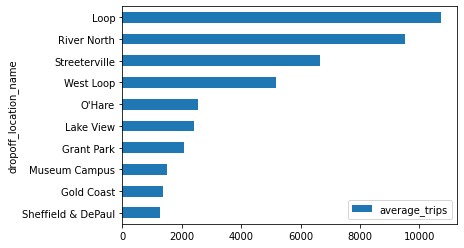

In [104]:
chicago_region.sort_values(
    by='average_trips',
).set_index(
    "dropoff_location_name"
).tail(10).plot.barh()

### Conclusions

    - 'Chicago_region' has two columns, namely 'dropoff_location_name' and 'average_trips', where at this point the variable displays the identification of the area used as the delivery point. Thereafter, in the data displayed, we have got the top 10 regions as delivery points, namely:
    
        1. Loop by the average trips 10727.466667
        2. River North by the average trips 9523.666667
        3. Streeterville by the average trips 6664.666667
        4. West Loop by the average trips 5163.666667
        5. O'Hare by the average trips 2546.900000
        6. Lake View by the average trips 2420.966667
        7. Grant Park by the average trips 2068.533333
        8. Museum Campus by the average trips 1510.000000
        9. Gold Coast by the average trips 1364.233333
        10. Sheffield & DePaul by the average trips 1259.766667

[Back to Contents](#tableofcontents)

## Graph Analysis
    - Step 4. Making Graphs for Analysis

<div style="border:solid black 2px; padding: 20px">
    
    In this session, we are going to make Graphs for doing analysis the datasets.
    
</div>

In [105]:
taxi_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


<AxesSubplot:ylabel='company_name'>

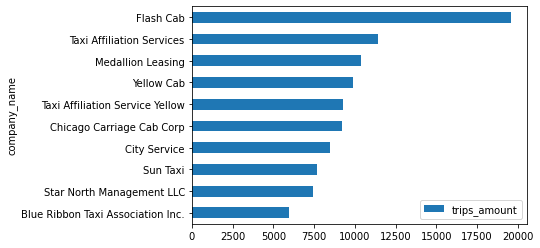

In [106]:
taxi_company.sort_values(
    by='trips_amount',
).set_index(
    "company_name"
).tail(10).plot.barh()

In [107]:
chicago_region

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


<AxesSubplot:ylabel='dropoff_location_name'>

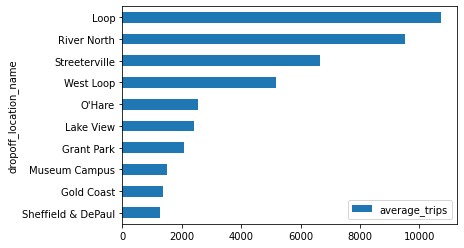

In [108]:
chicago_region.sort_values(
    by='average_trips',
).set_index(
    "dropoff_location_name"
).tail(10).plot.barh()

In [109]:
taxi_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


array([[<AxesSubplot:title={'center':'trips_amount'}>]], dtype=object)

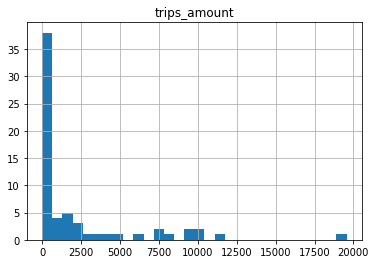

In [110]:
taxi_company.hist('trips_amount', bins=30)

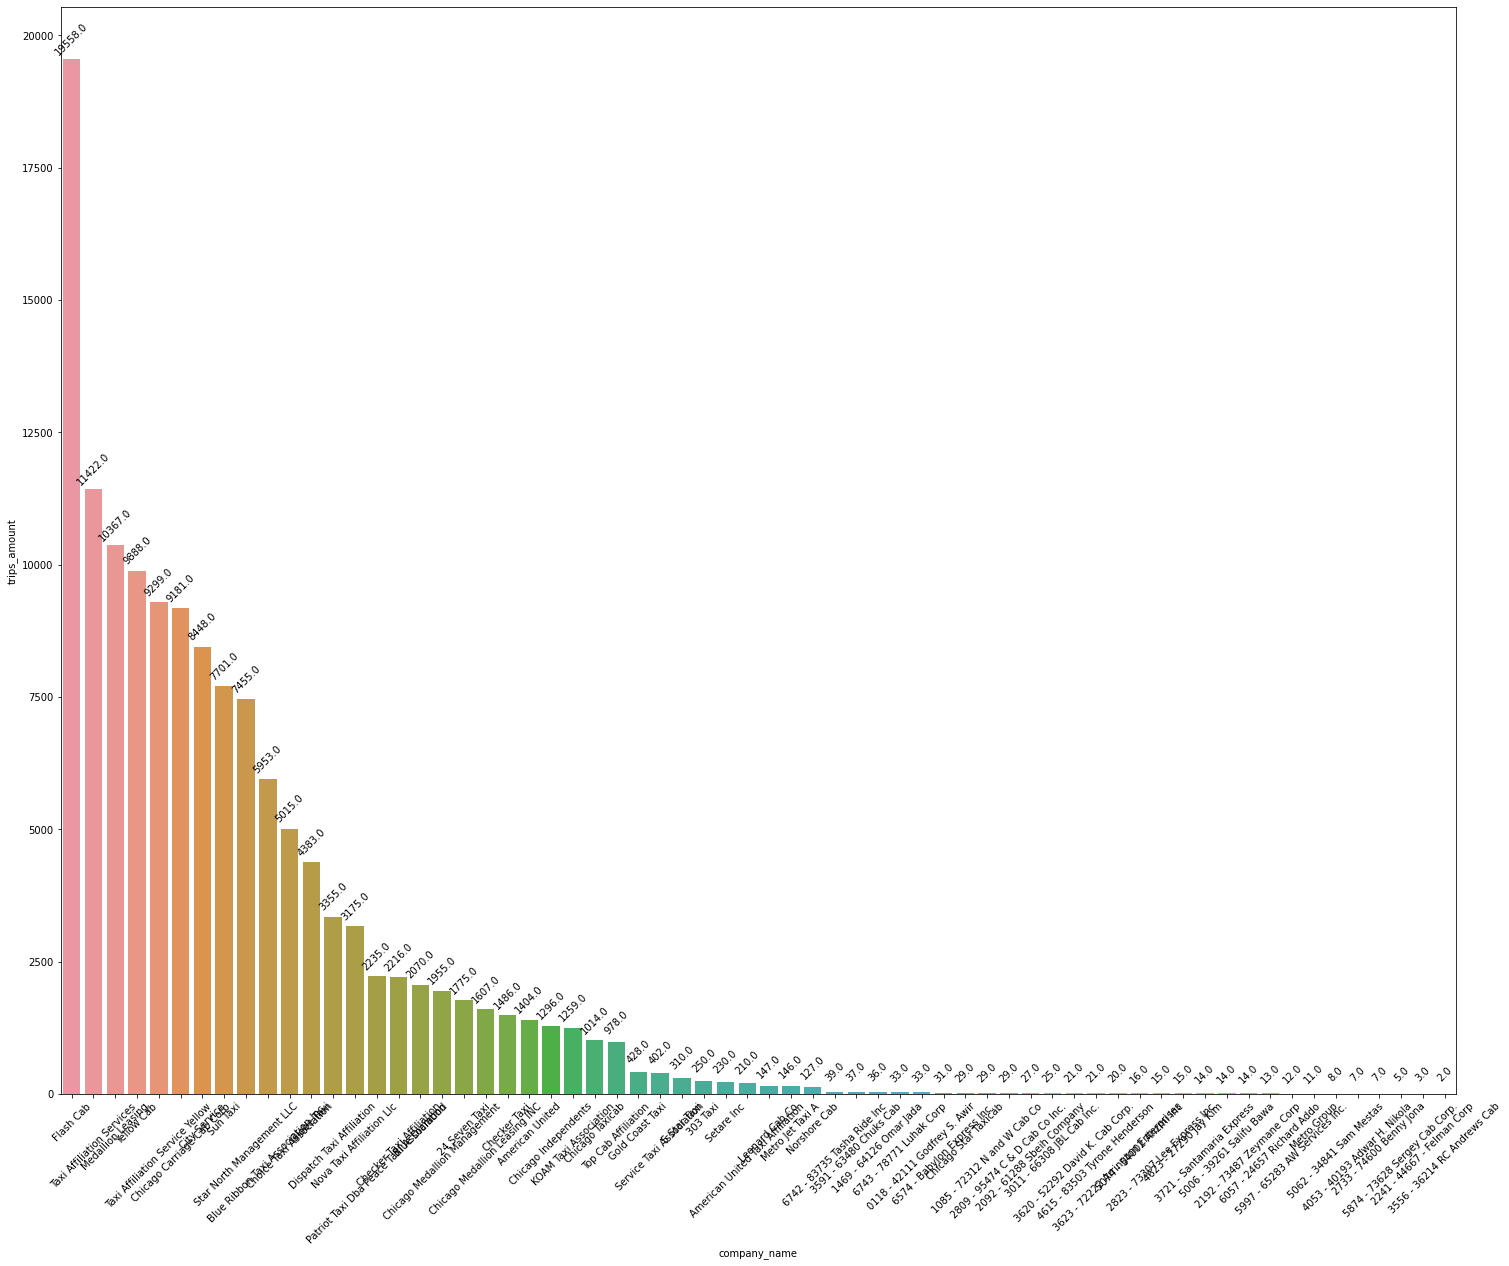

In [111]:
plt.figure(figsize=(25,20))
splot = sns.barplot(data=taxi_company, x='company_name', y='trips_amount')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')

plt.xticks(rotation = 45)
plt.show()

In [112]:
chicago_region.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


array([[<AxesSubplot:title={'center':'average_trips'}>]], dtype=object)

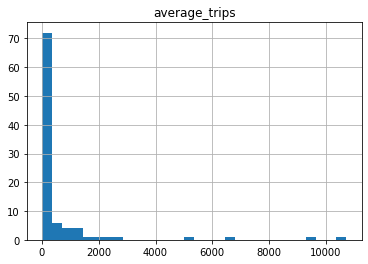

In [113]:
chicago_region.hist('average_trips', bins=30)

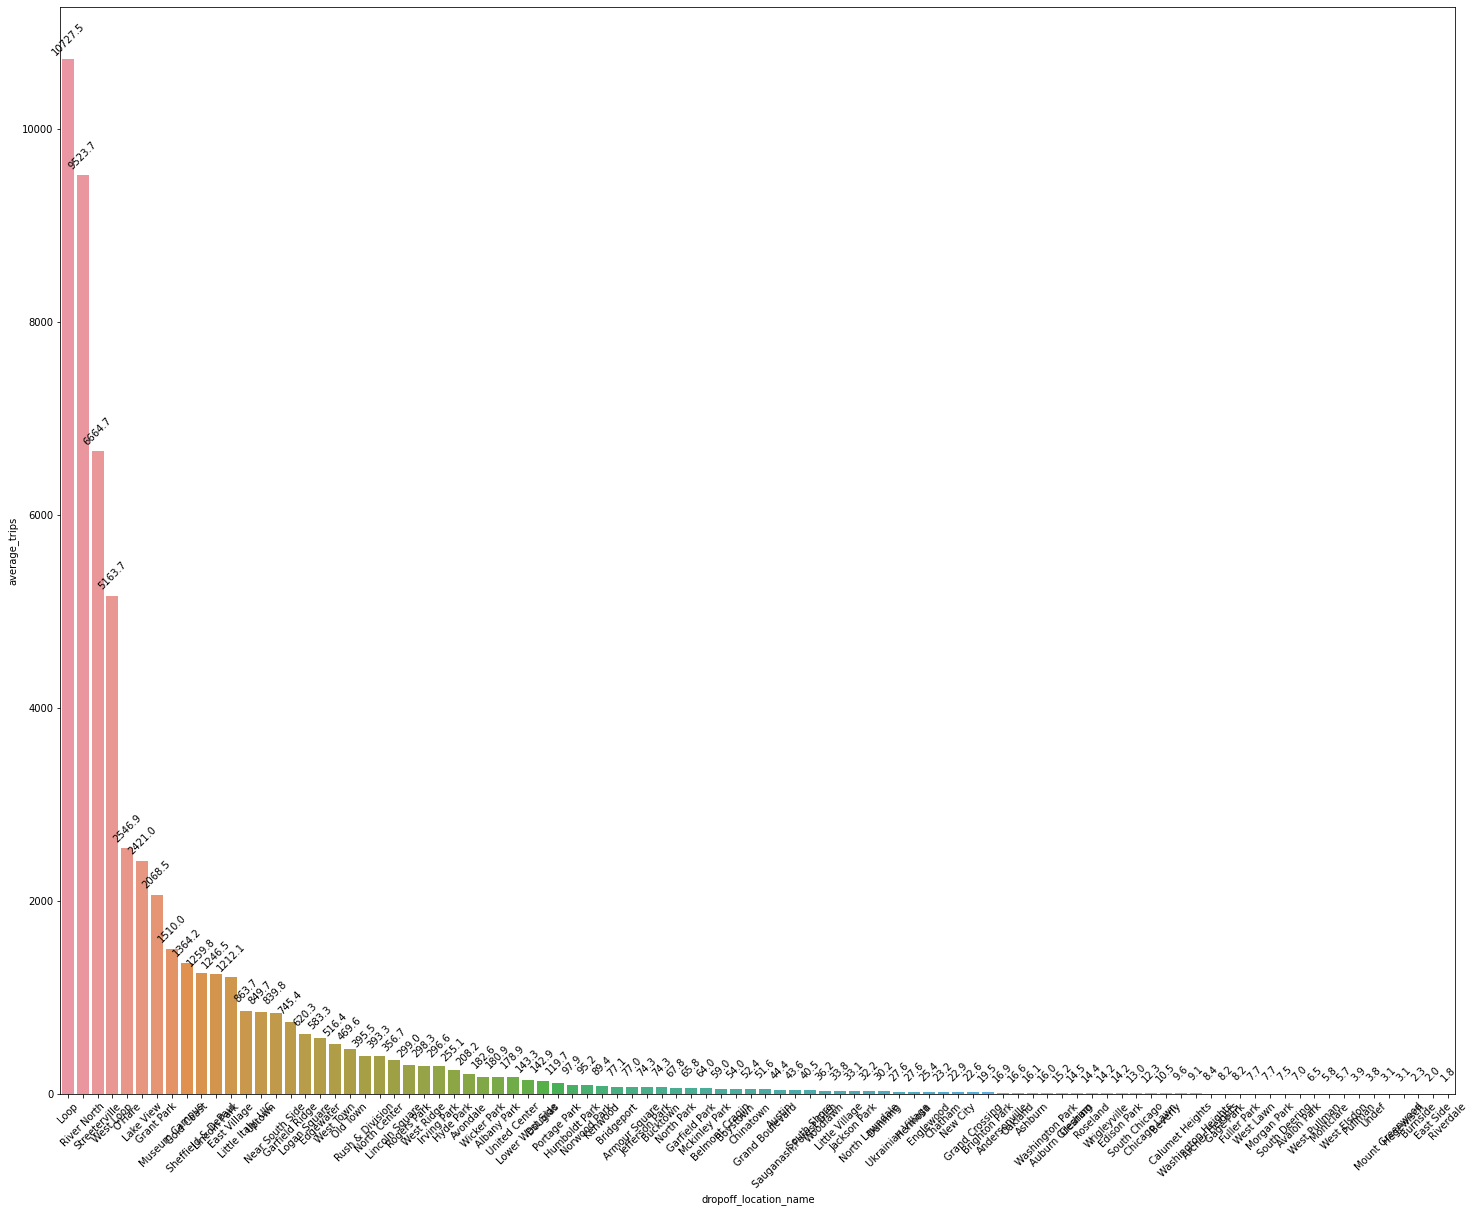

In [114]:
plt.figure(figsize=(25,20))
splot = sns.barplot(data=chicago_region, x='dropoff_location_name', y='average_trips')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')

plt.xticks(rotation = 45)
plt.show()

# Top 10 Regions Graph

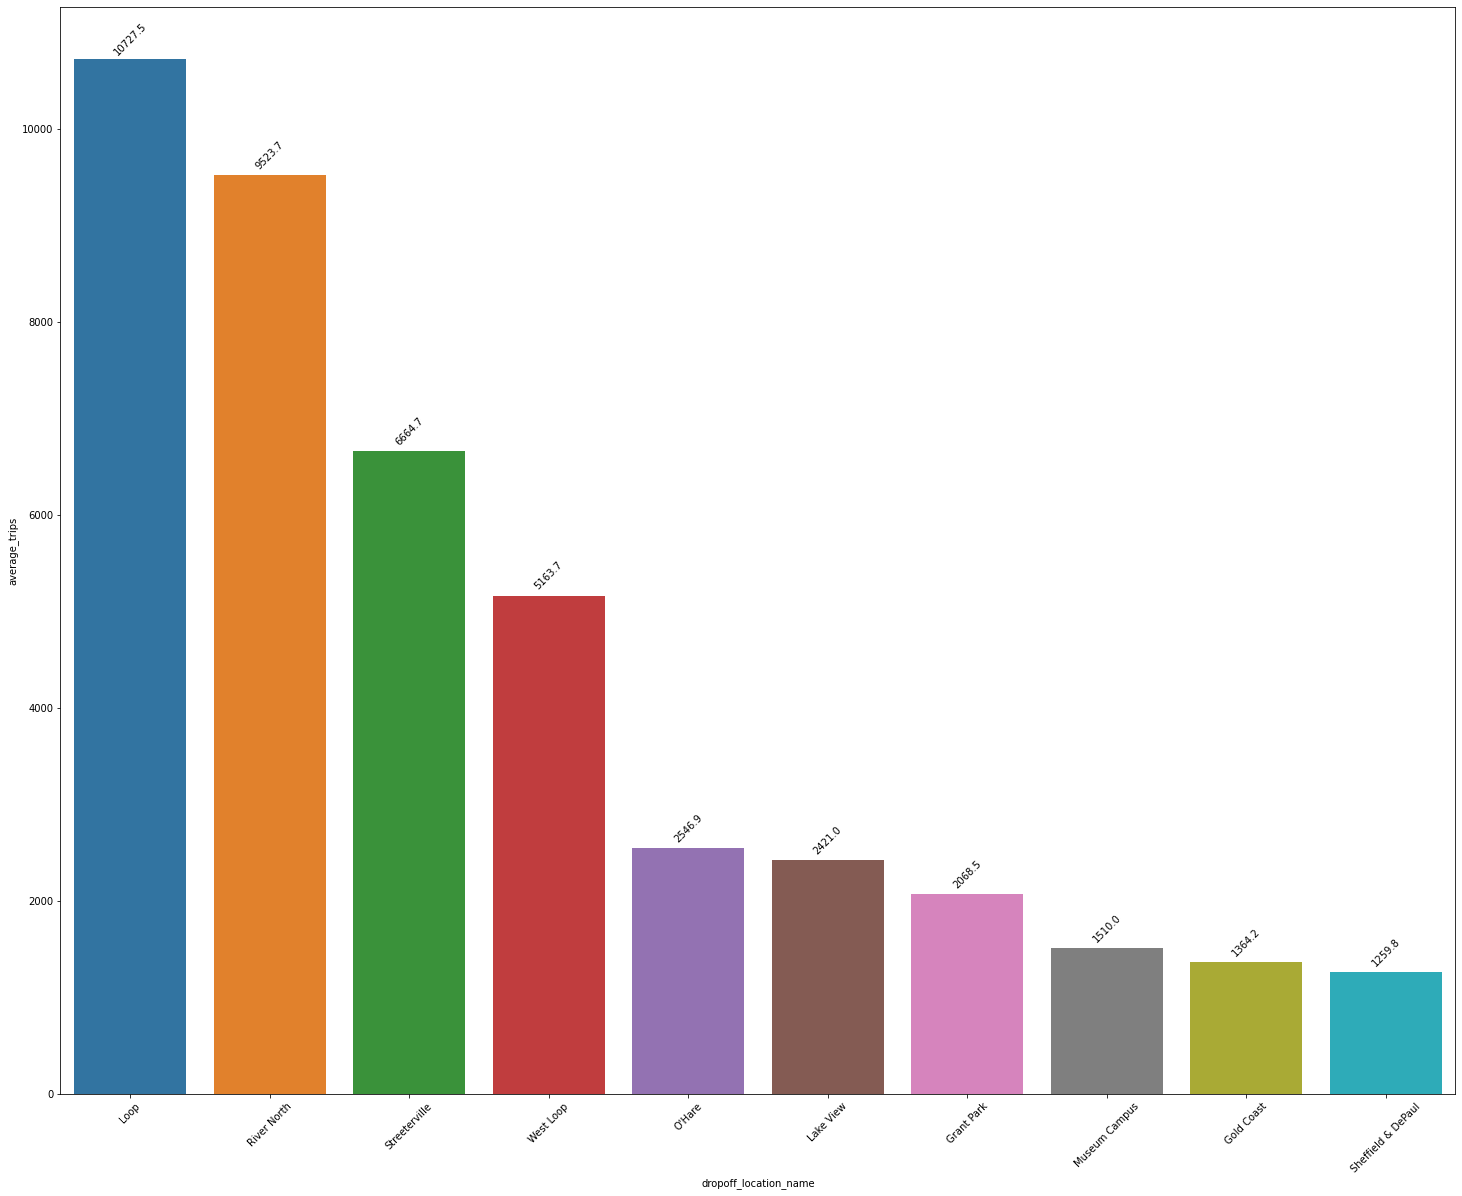

In [115]:
top_10_location = chicago_region.sort_values(by='average_trips', ascending=False).head(10)

plt.figure(figsize=(25,20))
splot = sns.barplot(data=top_10_location , x='dropoff_location_name', y='average_trips')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')

plt.xticks(rotation = 45)
plt.show()

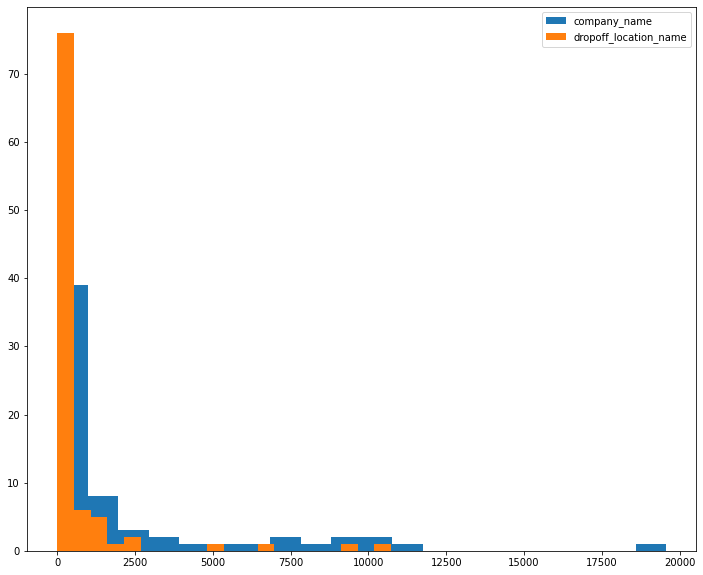

In [116]:
plt.figure(figsize=(12, 10))
plt.hist(taxi_company['trips_amount'], bins=20, label='company_name')
plt.hist(chicago_region['average_trips'], bins=20, label='dropoff_location_name')
plt.legend()
plt.show()

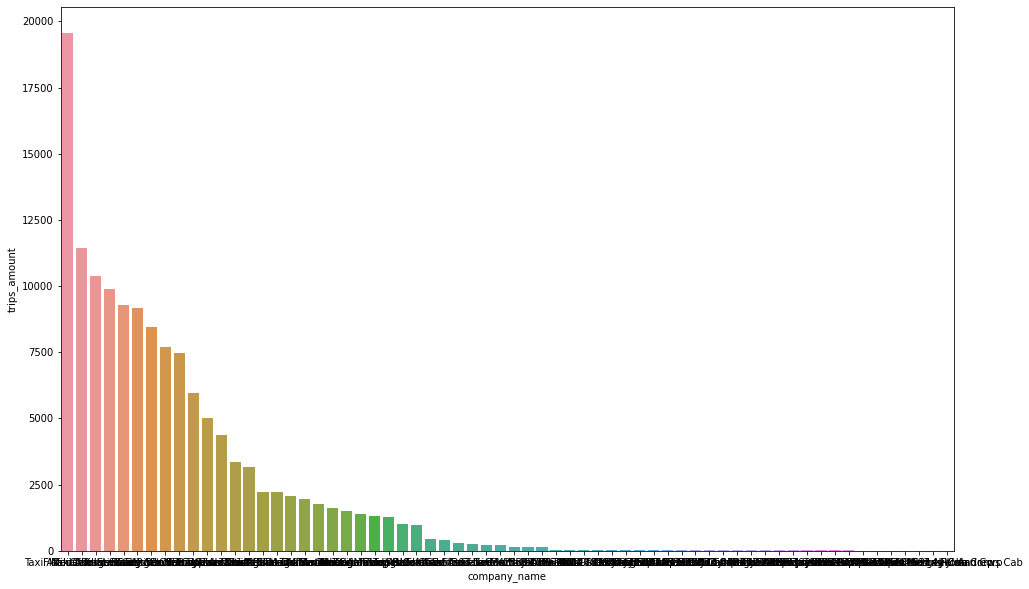

In [117]:
taxi_company_first = taxi_company.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,10))
sns.barplot(data=taxi_company_first,x='company_name',y='trips_amount')
plt.show()

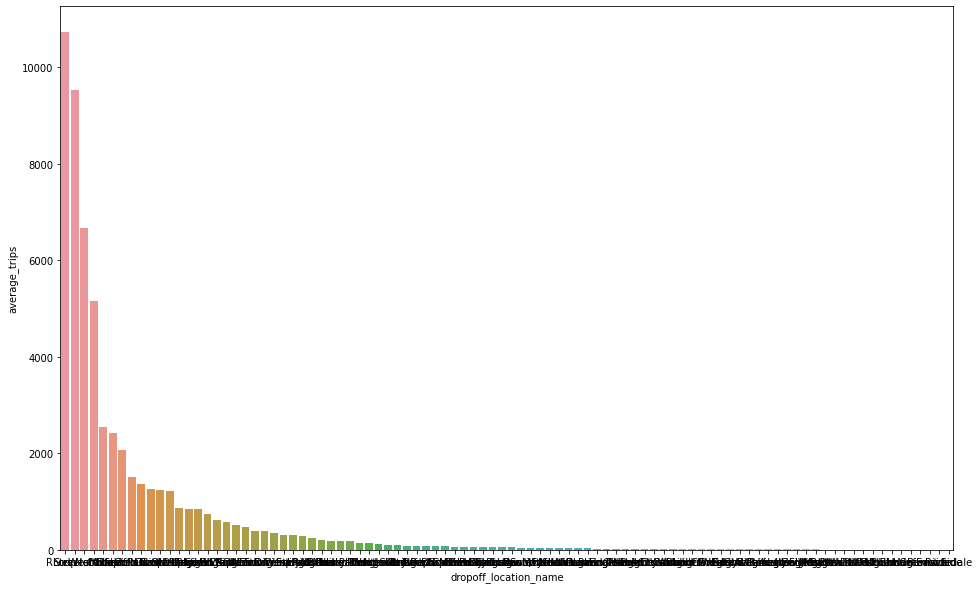

In [34]:
chicago_region_first = chicago_region.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,10))
sns.barplot(data=chicago_region_first,x='dropoff_location_name',y='average_trips')
plt.show()

### Conclusions

    - The graphs above show an increasing correlation of taxi companies and their number of deliveries, the top 10 regions by number of deliveries. The graphs also show that there is always a delivery made in each phases. It could be concluded that ride-sharing companies continue to grow and passenger preferences continue to use these delivery travel services. Subsequently, the frequency of trips related to the influence of weather mostly does not show the impact of external factors on trips.

[Back to Contents](#tableofcontents)

## Hypothesis Testing
    - Step 5. Doing Tests on The Hypothesis

<div style="border:solid black 2px; padding: 20px">
    
    We are going to test the following hypothesis:

    "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."

    we will determine the level of significance (alpha) = 5%.

    Then, we will explain:
    - How do we formulate the null hypothesis and alternative hypothesis.
    - What criteria we used to test our hypothesis and why we used them.
    
</div>

### Hypothesis: The average journey duration from the Loop to O'Hare International Airport

- **"The average journey duration from the Loop to O'Hare International Airport changes on rainy Saturdays."**

- Default alpha value 5%.

- Statistical Test (student t-test independent 2 samples).

- Comparing the p-value of statistical test results with the alpha value.

### Formulating the null hypothesis and alternative hypothesis

- **H0 = The average journey duration from the Loop to O'Hare International Airport does not change on rainy Saturdays**
- **H1 = The average journey duration from the Loop to O'Hare International Airport changes on rainy Saturdays**

In [118]:
loop_bandara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [119]:
rating_duration = loop_bandara.groupby('weather_conditions')['duration_seconds'].agg(['mean', 'var'])
rating_duration

,mean,var
weather_conditions,,
Bad,2427.205556,520294.086002
Good,1999.675676,576382.009690


In [120]:
sample_1 = loop_bandara[loop_bandara['weather_conditions'] == 'Good']['duration_seconds']
sample_2 = loop_bandara[loop_bandara['weather_conditions'] == 'Bad']['duration_seconds']

In [63]:
sample_1

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [64]:
sample_2

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

In [65]:
sample_1.mean()

1999.6756756756756

In [66]:
sample_2.mean()

2427.2055555555557

In [67]:
st.levene(sample_1, sample_2)

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

In [68]:
st.ttest_ind( 
    sample_1,
    sample_2,
    equal_var=True)

Ttest_indResult(statistic=-6.946177714041499, pvalue=6.517970327099473e-12)

In [70]:
alpha = 0.05
results = st.ttest_ind( 
                        sample_1,
                        sample_2,
                        equal_var=True)

In [72]:
results.pvalue

6.517970327099473e-12

### Testing the Hypothesis 

In [82]:
if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Reject the null hypothesis


### Findings

    - We have tested the following hypothesis:
    "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."
    
	- After analyzing the available data, we could conclude that:
    Accepted of H1: "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."

    - The hypothesis testing have already rejected the null hypothesis. In other words, we succeed to reject the null hypothesis. If indeed there are passenger preferences and the impact of external factors on trips related to the influence of weather on trip frequency, unfortunately we could not know this from these datas due to from this hypothesis testing, we push to know the focus on the average trip duration from "the Loop to O'Hare International Airport changes on rainy Saturdays". It means that it happens just for a while condition, time, and purpose place taken. Meanwhile, it could not be said to judge the datas as a whole.

[Back to Contents](#tableofcontents)

## Presentation
    - Step 6. Presenting My Project to The Viewers

<div style="border:solid black 2px; padding: 20px">
    
    This is my presentation of 'Understanding Passenger Preferences and The Impact of Trips External Factors on Zuber Ride-Sharing Company' project by me, awrb.

</div>

Presentation Link: https://drive.google.com/file/d/1ppZvlI7qNbPcStAPdTjTuMte-bddT7-o/view?usp=sharing

[Back to Contents](#tableofcontents)

## General Conclusion
    - Step 7. Formulating General Conclusions

    1. In the Data Overview step, first, we import and read all of the files needed, i.e. in this section there are three files:
    - /datasets/project_sql_result_01.csv 
    - /datasets/project_sql_result_04.csv 
    - /datasets/project_sql_result_07.csv

	- In the following data overview, our focus is on two files with the variable names 'taxi_company' and 'chicago_region'. After we read the data, in 'taxi_company', there are two columns, namely 'company_name' with 'object' data type and 'trips_amount' with 'integer' data type. In 'chicago_region', there are also two columns, namely 'dropoff_location_name' with 'object' data type and 'average_trips' with 'float' data type.

        1. For 'taxi_company'
            - The dataset amounted 64 rows and 2 columns.
            - With data detailed, dtypes: int64(1), object(1).
            - The capitalization of the columns names title are all already in lowercase letters.
            - Dataset memory usage: 1.1+ KB.
            - In the result of '.head()' function, the dataset displays that this data consists of integer numerical and letters.

        2. For 'chicago_region'
            - The dataset amounted 94 rows and 2 columns.
            - With data detailed, dtypes: float64(1), object(1).
            - The capitalization of the columns names title are all already in lowercase letters.
            - Dataset memory usage: 1.6+ KB.
            - In the result of '.head()' function, the dataset displays that this data consists of decimal numerical and letters.

	- At a glance, between 'taxi_company' and 'chicago_region' displays the correct data and the data is ready to be processed.

    2. From the previous conclusion, where at the first glance the data looks correct, in this section we will confirm it again that by using several functions of data types, array form, missing values and duplicate data, the datas display that they are correct.

    3. 'Chicago_region' has two columns, namely 'dropoff_location_name' and 'average_trips', where at this point the variable displays the identification of the area used as the delivery point. Thereafter, in the data displayed, we have got the top 10 regions as delivery points, namely:
    1. Loop by the average trips 10727.466667
    2. River North by the average trips 9523.666667
    3. Streeterville by the average trips 6664.666667
    4. West Loop by the average trips 5163.666667
    5. O'Hare by the average trips 2546.900000
    6. Lake View by the average trips 2420.966667
    7. Grant Park by the average trips 2068.533333
    8. Museum Campus by the average trips 1510.000000
    9. Gold Coast by the average trips 1364.233333
    10. Sheffield & DePaul by the average trips 1259.766667	

    4. The graphs above show an increasing correlation of taxi companies and their number of deliveries, the top 10 regions by number of deliveries. The graphs also show that there is always a delivery made in each phases. It could be concluded that ride-sharing companies continue to grow and passenger preferences continue to use these delivery travel services. Subsequently, the frequency of trips related to the influence of weather mostly does not show the impact of external factors on trips.

    5. We have tested the following hypotheses:
    - "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."
    
	- After analyzing the available data, we can conclude that:
    Accepted of H1: "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."

    - The hypothesis testing have already rejected the null hypothesis. In other words, we succeed to reject the null hypothesis. If indeed there are passenger preferences and the impact of external factors on trips related to the influence of weather on trip frequency, unfortunately we could not know this from these datas due to from this hypothesis testing, we push to know the focus on the average trip duration from "the Loop to O'Hare International Airport changes on rainy Saturdays". It means that it happens just for a while condition, time, and purpose place taken. Meanwhile, it could not be said to judge the datas as a whole.

[Back to Contents](#tableofcontents)